
<a id='chap-tpsvmlineaires'></a>

# Final Exam - SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Loading data
iris = datasets.load_iris()

In [2]:
X, y = iris.data[:, :2], iris.target
# We keep 50% of the data set for the evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [3]:
C = 1.0 # regularization parameter
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

# Question 1:

In [129]:
# Calculate the score of well-classified samples on the test dataset
print('score is {}'.format(lin_svc.score(X_test,y_test)))

score is 0.78


Text(0.5, 1.0, 'LinearSVC')

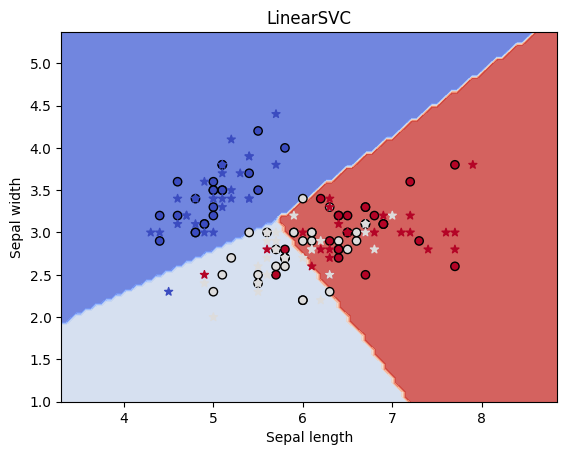

In [5]:
# Create the discretized decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# To display the decision surface we will discretize the space with a step h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Also show learning points
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

# Question 2

Displaying decision boundary with different values of C

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

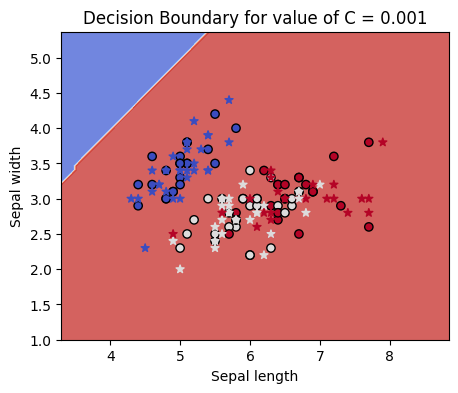

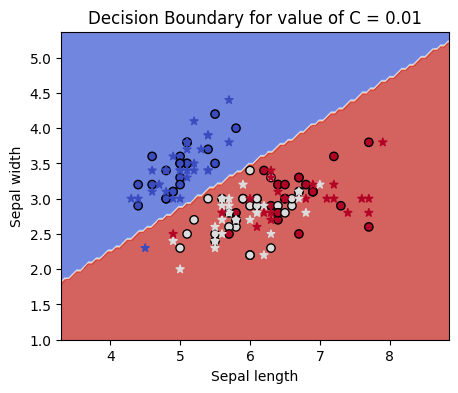

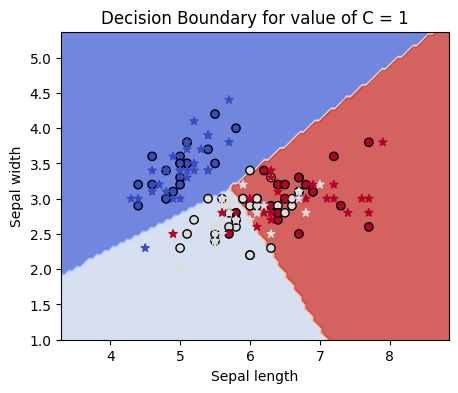

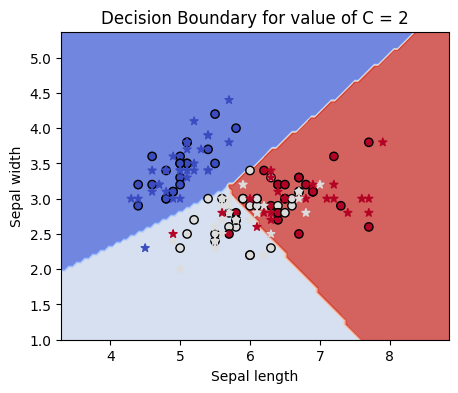

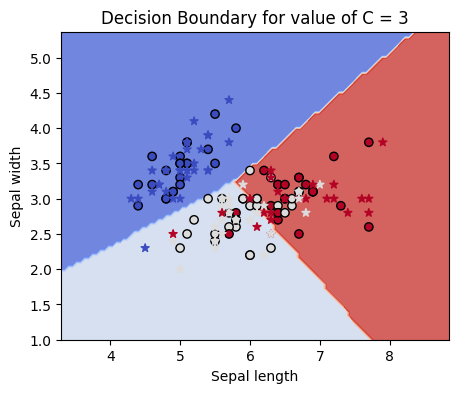

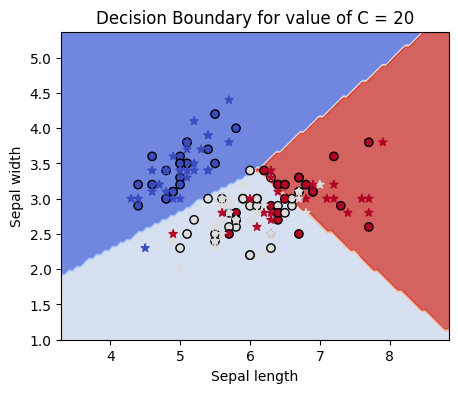

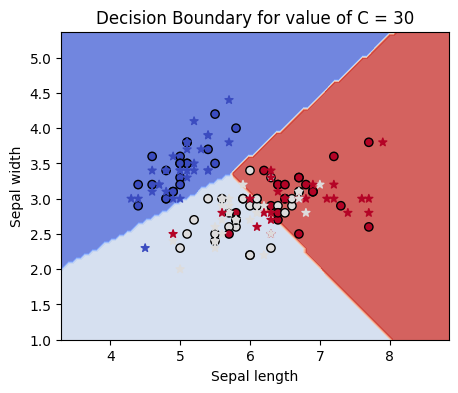

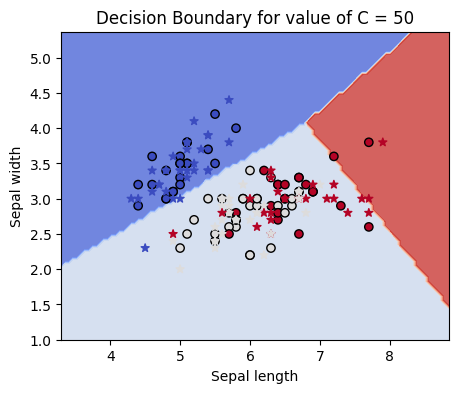

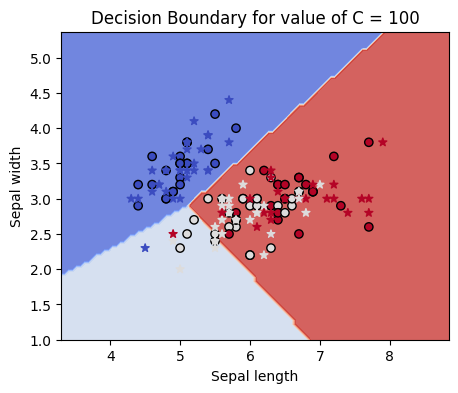

In [15]:
def display_decision_boundary(plt_obj, plot_count, lin_svc, X, X_train, X_test, title):
  # Create the discretized decision surface
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # To display the decision surface we will discretize the space with a step h
  h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Decision surface
  Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt_obj.figure(plot_count, figsize=(5, 4))
  plt_obj.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Also show learning points
  plt_obj.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
  plt_obj.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
  plt_obj.xlabel('Sepal length')
  plt_obj.ylabel('Sepal width')
  plt_obj.title(title)


C = [0.001, 0.01, 1, 2, 3, 20, 30, 50, 100] # different values of regularization parameter

plot_count = 1
for c_value in C:
  lin_svc = svm.LinearSVC(C=c_value)
  lin_svc.fit(X_train, y_train)
  display_decision_boundary(plt, plot_count, lin_svc, X, X_train, X_test, f'Decision Boundary for value of C = {c_value}')
  plot_count = plot_count + 1


In [18]:
# Get the target classes
classes = iris.target_names

# Display the number of classes
num_classes = len(classes)
print(f"The dataset has {num_classes} classes.")

The dataset has 3 classes.


Also, by carefully visualizing the decision-boundary plots, and from the code above we can conclude that the dataset has three classes. With various values of ‘C’ we could not clearly separate the datapoints in three classes. The datapoints are overlapped at places and not completely linearly separable by the LinearSVC model.

# Question 3:

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


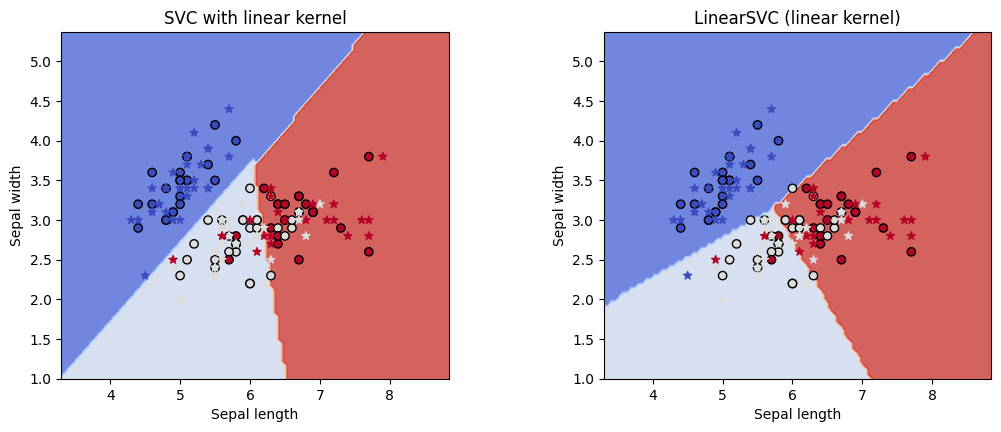

In [20]:
C = 1.0 # regularization parameter
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Use a color palette
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Also show learning points
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

We can check the score for both LinearSVC() and SVC(kernel='linear') as below :

In [21]:
C = 1.0 # regularization parameter
lin_svc_model_1 = svm.LinearSVC(C=C)
lin_svc_model_1.fit(X_train, y_train)

lin_svc_model_2 = svm.SVC(kernel='linear')
lin_svc_model_2.fit(X_train, y_train)

# Calculate the score for LinearSVC()
print('score is {}'.format(lin_svc_model_1.score(X_test,y_test)))

# Calculate the score for SVC(kernel='linear')
print('score is {}'.format(lin_svc_model_2.score(X_test,y_test)))

score is 0.8266666666666667
score is 0.8533333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


With the scores obtained and considering how SVC(kernel='linear') optimizes different cost function (using One-vs-One approach). We can further use this model to obtain better results.

Updating dataset for using four attributes :

In [51]:
X_new, y_new = iris.data[:, :4], iris.target
# We keep 50% of the data set for the evaluation
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.5)

Using GridSearch to optimize performance of the model:

In [52]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV hyperparameters tuning
param_grid = {'C': [0.0001, 0.001, 0.01, 1, 1.5, 5, 20, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 27, 28, 30, 32, 35, 45, 50]}

svm_classifier = svm.SVC(kernel='linear')
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_new, y_train_new)

# Get the best C
best_C = grid_search.best_params_['C']
best_svm_classifier = grid_search.best_estimator_

print("Best C:", best_C)

Best C: 1.5


In [57]:
C=best_C
lin_svc_new = svm.SVC(kernel='linear',C=C)
lin_svc_new.fit(X_train_new, y_train_new)

# Calculate the score for SVC(kernel='linear') with C=1.5
print('score is {}'.format(lin_svc_new.score(X_test_new,y_test_new)))

score is 0.9466666666666667


Hence we can see that the test classification score is increased for SCV(kernel='linear') and best value of C= 1.5 from 84% to 94.66%

# Question 4:

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [72]:
X, y = digits.data[:, :], digits.target
# We keep 50% of the data set for the evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [73]:
C = 1.0 # regularization parameter
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [74]:
# Calculate the score of well-classified samples on the test dataset
print('score is {}'.format(lin_svc.score(X_test,y_test)))

score is 0.9388209121245829


We will try to optimize with best C value:

In [89]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Example with GridSearchCV for Decision Tree hyperparameters
param_grid = {'C': [0.0001, 0.001, 0.01, 1, 1.5, 5, 20, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 27, 28, 30, 32, 35, 45, 50]}

svm_classifier = svm.LinearSVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best C
best_C = grid_search.best_params_['C']
best_svm_classifier = grid_search.best_estimator_

In [90]:
print("Best C:", best_C)

Best C: 0.001


Using the best C value and checking the results score:

In [91]:
C = best_C # regularization parameter
lin_svc_new = svm.LinearSVC(C=C)
lin_svc_new.fit(X_train, y_train)

LinearSVC(C=0.001)

In [92]:
# Calculate the score of well-classified samples on the test dataset
print('score is {}'.format(lin_svc_new.score(X_test,y_test)))

score is 0.9488320355951056


We obtain the best generalization results for the value of C as 0.001 with score of 94.88%

# Question 5:

Text(0.5, 1.0, 'SVM RBF')

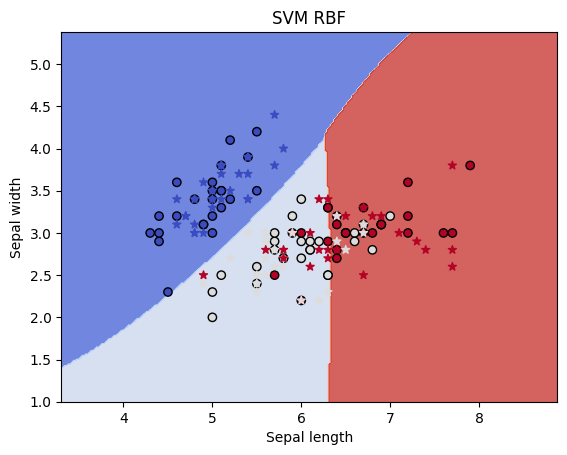

In [114]:
X, y = iris.data[:,:2], iris.target
# We keep 50% of the data set for the evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train)

# To display the decision surface we will discretize the space with a #step h
h = .02
# Create the discretized decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Also show learning points
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")


In [115]:
# Calculate the score of well-classified samples on the test dataset
print('score is {}'.format(clf.score(X_test,y_test)))

score is 0.7866666666666666


Test the effect of the kernel scaling parameter (gamma) and the regularization parameter C on gaussian kernel model :

In [122]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Example with GridSearchCV for Decision Tree hyperparameters
param_grid = {'C': [0.0001, 0.001, 0.01, 1, 1.5, 5, 20, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 27, 28, 30, 32, 35, 45, 50],
              'gamma' : [0.0001, 0.001, 0.01, 1, 1.5, 5, 20, 21, 21.5, 22]}

svm_classifier = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best C
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_svm_classifier = grid_search.best_estimator_

print("Best C:", best_C)
print("Best gamma:", best_gamma)

Best C: 5
Best gamma: 0.01


In [130]:
C=best_C
gamma=best_gamma
rbf_svc = svm.SVC(kernel='rbf',C=C, gamma=gamma)
rbf_svc.fit(X_train, y_train)

# Calculate the score for SVC(kernel='rbf') with C=5
print('score is {}'.format(rbf_svc.score(X_test,y_test)))

score is 0.86


# Question 6:

Calculating cross validation score to compare LinearSVC and SVC(kernerl='linear') and SVC(kernerl='rbf'):

In [132]:
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import cross_val_score

# Linear SVC
svc_linear = LinearSVC(C=1)
scores_linear = cross_val_score(svc_linear, X, y, cv=5)

# SVC with linear kernel
svc_linear_2 = SVC(kernel='linear', C=1)
scores_linear_2 = cross_val_score(svc_linear_2, X, y, cv=5)

# SVC with RBF kernel
svc_rbf = SVC(kernel='rbf')
scores_rbf = cross_val_score(svc_rbf, X, y, cv=5)

print("Accuracy with Linear SVC:", scores_linear.mean())
print("Accuracy with SVC(kernel='linear'):", scores_linear_2.mean())
print("Accuracy with RBF Kernel:", scores_rbf.mean())


Accuracy with Linear SVC: 0.7733333333333332
Accuracy with SVC(kernel='linear'): 0.8066666666666666
Accuracy with RBF Kernel: 0.82
